# 深度学习入门:基于python 理论和实现




In [6]:
import numpy as np
x = np.array([0,1])
w = np.array([0.5,0.5])
b = -0.7
y = np.sum(w*x) + b
print(y)

-0.19999999999999996


# 异或门


In [7]:
import numpy as np

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

if __name__ == "__main__":
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = XOR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


## 阶跃函数
x > 0    1
x <= 0   0
# numpy 广播


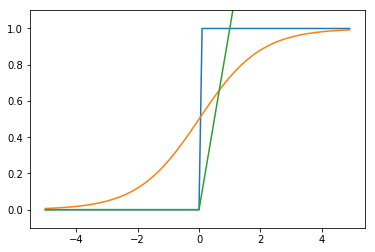

In [28]:
import numpy as np
from matplotlib.pylab import plt

def step_function(x):
    return np.array(x>0,dtype=np.int)
def sigmoid(x):
    return 1/(1+np.exp(-x))
def relu(x):
    return np.maximum(0,x)

x = np.arange(-5.0,5.0,0.1)
y = step_function(x)
y1 = sigmoid(x)
y2 = relu(x)
plt.plot(x,y,x,y1,x,y2)
plt.ylim(-0.1,1.1)
plt.show()


## mnist_show

%matplotlib inline 可以在Ipython编译器里直接使用，功能是可以内嵌绘图，并且可以省略掉plt.show()这一步



<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG (1100, 867) RGB


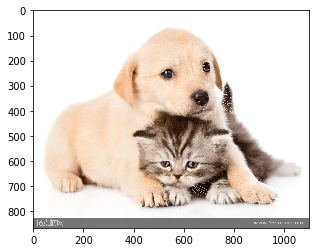

In [11]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
with Image.open('cat.jpg') as img:
    print(type(img))
    print(img.format,img.size,img.mode)
    #img.show()   #显示在外面
    plt.imshow(img)


In [30]:
import sys,os
# 导入父目录的文件到sys path
sys.path.append(os.pardir)
#print(os.pardir)
#print(sys.path)

import numpy as np
from dataset.mnist import load_mnist
from PIL import Image
import matplotlib.pyplot as plt
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

#预先下载下来
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)  # 把图像的形状变为原来的尺寸
print(img.shape)  # (28, 28)
img_show(img)


5
(784,)
(28, 28)


# pickle 保存和读取

In [33]:
import pickle
a_dict={'you':100,'jie':99,'sun':[1,1,2,3]}
with open("test.pickle",'wb') as file:
        pickle.dump(a_dict,file)

In [35]:
import pickle
with open("test.pickle","rb") as file:
    a_dict1=pickle.load(file)
print(a_dict1)

{'you': 100, 'jie': 99, 'sun': [1, 1, 2, 3]}


# 11行代码实现 神经网络


In [49]:
import numpy as np

X = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ])
y = np.array([[0,1,1,0]]).T
syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1
for j in range(60000):
    l1 = 1/(1+np.exp(-(np.dot(X,syn0))))
    l2 = 1/(1+np.exp(-(np.dot(l1,syn1))))
    l2_delta = (y - l2)*(l2*(1-l2))
    l1_delta = l2_delta.dot(syn1.T) * (l1 * (1-l1))
    syn1 += l1.T.dot(l2_delta)
    syn0 += X.T.dot(l1_delta)
print(l2)

[[0.00395374]
 [0.99568925]
 [0.9967036 ]
 [0.00477395]]


## 两层神经网络

In [48]:
import numpy as np

# sigmoid function
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

# input dataset
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])

# output dataset            
y = np.array([[0,0,1,1]]).T

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,1)) - 1

for iter in range(10000):

    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))

    # how much did we miss?
    l1_error = y - l1

    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin(l1,True)

    # update weights
    syn0 += np.dot(l0.T,l1_delta)
print("Output After Training:")
print(l1)

Output After Training:
[[0.00966449]
 [0.00786506]
 [0.99358898]
 [0.99211957]]


## 三层神经网络

In [53]:
import numpy as np

def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)

    return 1/(1+np.exp(-x))

X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])

y = np.array([[0],
            [1],
            [1],
            [0]])

np.random.seed(1)

# randomly initialize our weights with mean 0
syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1

for j in range(60000):

    # Feed forward through layers 0, 1, and 2
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))

    # how much did we miss the target value?
    l2_error = y - l2

    if (j% 10000) == 0:
        print("Error L2:" + str(np.mean(np.abs(l2_error))))

    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error*nonlin(l2,deriv=True)

    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)
    if (j% 10000) == 0:
        print("Error L1:" + str(np.mean(np.abs(l1_error))))

    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * nonlin(l1,deriv=True)

    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)
print(l2)

Error L2:0.49641003190272537
Error L1:0.08131810260532474
Error L2:0.008584525653247153
Error L1:0.0005407483355450945
Error L2:0.005789459862507809
Error L1:0.0002578471084400257
Error L2:0.004629176776769984
Error L1:0.00016907507783458953
Error L2:0.003958765280273649
Error L1:0.00012578559120336757
Error L2:0.003510122567861676
Error L1:0.00010017306235996432
[[0.00260572]
 [0.99672209]
 [0.99701711]
 [0.00386759]]


# 梯度下降法

In [55]:
import numpy as np
 
# compute sigmoid nonlinearity
def sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output
 
# convert output of sigmoid function to its derivative
def sigmoid_output_to_derivative(output):
    return output*(1-output)
 
# input dataset
X = np.array([  [0,1],
                [0,1],
                [1,0],
                [1,0] ])
 
# output dataset           
y = np.array([[0,0,1,1]]).T
 
# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
 
# initialize weights randomly with mean 0
synapse_0 = 2*np.random.random((2,1)) - 1
 
for iter in range(10000):
 
    # forward propagation
    layer_0 = X
    layer_1 = sigmoid(np.dot(layer_0,synapse_0))
 
    # how much did we miss?
    layer_1_error = layer_1 - y
 
    # multiply how much we missed by the
    # slope of the sigmoid at the values in l1
    layer_1_delta = layer_1_error * sigmoid_output_to_derivative(layer_1)
    synapse_0_derivative = np.dot(layer_0.T,layer_1_delta)
 
    # update weights
    synapse_0 -= synapse_0_derivative
 
print("Output After Training:")
print(layer_1)

Output After Training:
[[0.00505119]
 [0.00505119]
 [0.99494905]
 [0.99494905]]


## 优化

In [57]:
import numpy as np
 
alphas = [0.001,0.01,0.1,1,10,100,1000]
 
# compute sigmoid nonlinearity
def sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output
 
# convert output of sigmoid function to its derivative
def sigmoid_output_to_derivative(output):
    return output*(1-output)
 
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])
 
y = np.array([[0],
              [1],
              [1],
              [0]])
 
for alpha in alphas:
    print("\nTraining With Alpha:" + str(alpha))
    np.random.seed(1)
 
    # randomly initialize our weights with mean 0
    synapse_0 = 2*np.random.random((3,4)) - 1
    synapse_1 = 2*np.random.random((4,1)) - 1
 
    for j in range(60000):
 
        # Feed forward through layers 0, 1, and 2
        layer_0 = X
        layer_1 = sigmoid(np.dot(layer_0,synapse_0))
        layer_2 = sigmoid(np.dot(layer_1,synapse_1))
 
        # how much did we miss the target value?
        layer_2_error = layer_2 - y
 
        if (j% 10000) == 0:
            print("Error after "+str(j)+" iterations:" + str(np.mean(np.abs(layer_2_error))))
 
        # in what direction is the target value?
        # were we really sure? if so, don't change too much.
        layer_2_delta = layer_2_error*sigmoid_output_to_derivative(layer_2)
 
        # how much did each l1 value contribute to the l2 error (according to the weights)?
        layer_1_error = layer_2_delta.dot(synapse_1.T)
 
        # in what direction is the target l1?
        # were we really sure? if so, don't change too much.
        layer_1_delta = layer_1_error * sigmoid_output_to_derivative(layer_1)
 
        synapse_1 -= alpha * (layer_1.T.dot(layer_2_delta))
        synapse_0 -= alpha * (layer_0.T.dot(layer_1_delta))



Training With Alpha:0.001
Error after 0 iterations:0.49641003190272537
Error after 10000 iterations:0.49516402549338606
Error after 20000 iterations:0.4935960431880486
Error after 30000 iterations:0.4916063585594306
Error after 40000 iterations:0.48910016654420474
Error after 50000 iterations:0.48597785784615843

Training With Alpha:0.01
Error after 0 iterations:0.49641003190272537
Error after 10000 iterations:0.45743107444190134
Error after 20000 iterations:0.35909720256339894
Error after 30000 iterations:0.2393581371589725
Error after 40000 iterations:0.14307065901337024
Error after 50000 iterations:0.09859642980892716

Training With Alpha:0.1
Error after 0 iterations:0.49641003190272537
Error after 10000 iterations:0.042888017000115825
Error after 20000 iterations:0.024098994228521613
Error after 30000 iterations:0.018110652146797846
Error after 40000 iterations:0.01498761627221092
Error after 50000 iterations:0.013014490538142583

Training With Alpha:1
Error after 0 iterations:0.4